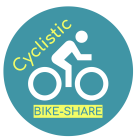

# Case Study: How Does a Bike-Share Navigate Speedy Succcess?

##**Background:**
>In this case study, we will be analyzing user data for Cyclistic, a hypothetical bike-sharing service in Chicago. The Objective is to identify the key differences in bike usage and behavior between their two types of users - "casual" and "member". The former pays for a single ride or full-day pass, while the latter pays for a yearly subscription to the service.

>To approach this business problem, we will follow the data analysis process defined in [Google Data Analytics Professional Certificate](https://grow.google/certificates/data-analytics/#?modal_active=none), which includes the following steps:


*   Ask
*   Prepare
*   Process
*   Analyze
*   Share
*   Act

>We will be using data sourced from Motivate International Inc under an [agreement](https://ride.divvybikes.com/data-license-agreement).

>Our motive is to provide valuable insights to Cyclistic that will help them optimize their services for both casual and member users.







##**Business Task**: 
Identifying Key Differences in Cyclistic ridership to Convert Casual Riders to Annual Members

###**Ask**:
Can you assist Cyclistic's marketing team in their goal to convert casual riders to annual members by analyzing the usage patterns and behavior of riders in Chicago? The objective is to provide insights into how casual and annual members use Cyclistic's bike-sharing service differently, and to identify the factors that influence their decision-making process in choosing between the pricing plans.

###**Prepare**:
>**Objective:** Familiarize with the data source and examine the data structure.

>The data utilized in this case study is obtained from a publicly accessible repository of monthly datasets provided by Motivate International Inc. The datasets are available in 'csv' format and can be downloaded from the repository's [website](https://divvy-tripdata.s3.amazonaws.com/index.html)

>For this analysis, we have obtained the datasets from the past 12 months, which are accessible through the Kaggle [dataset](https://www.kaggle.com/datasets/evangower/cyclistic-bike-share). As a first step, it is necessary to examine the data structure and become familiar with the organization of the data. This includes understanding the variables, data types, and data format used in the datasets. By gaining a comprehensive understanding of the data structure, we can better prepare and perform our data analysis, which will aid in identifying the key differences between casual and annual ridership patterns.

In [1]:
# Importing all libraries
import pandas as pd
from geopy.distance import distance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import urllib.request
from PIL import Image

In [2]:
# Importing datasets

# data1 = pd.read_csv("/content/drive/MyDrive/bike-share/202202-divvy-tripdata.csv")
# print(f"data1 rows and columns: ", data1.shape)

# data2 = pd.read_csv("/content/drive/MyDrive/bike-share/202203-divvy-tripdata.csv")
# print(f"data2 rows and columns: ", data2.shape)

# data3 = pd.read_csv("/content/drive/MyDrive/bike-share/202204-divvy-tripdata.csv")
# print(f"data3 rows and columns: ", data3.shape)

# data4 = pd.read_csv("/content/drive/MyDrive/bike-share/202205-divvy-tripdata.csv")
# print(f"data4 rows and columns: ", data4.shape)

# data5 = pd.read_csv("/content/drive/MyDrive/bike-share/202206-divvy-tripdata.csv")
# print(f"data5 rows and columns: ", data5.shape)

# data6 = pd.read_csv("/content/drive/MyDrive/bike-share/202207-divvy-tripdata.csv")
# print(f"data6 rows and columns: ", data6.shape)

# data7 = pd.read_csv("/content/drive/MyDrive/bike-share/202208-divvy-tripdata.csv")
# print(f"data7 rows and columns: ", data7.shape)

# data8 = pd.read_csv("/content/drive/MyDrive/bike-share/202209-divvy-publictripdata.csv")
# print(f"data8 rows and columns: ", data8.shape)

data9 = pd.read_csv("/content/drive/MyDrive/bike-share/202210-divvy-tripdata.csv")
print(f"data9 rows and columns: ", data9.shape)

data10 = pd.read_csv("/content/drive/MyDrive/bike-share/202211-divvy-tripdata.csv")
print(f"data10 rows and columns: ", data10.shape)

data11 = pd.read_csv("/content/drive/MyDrive/bike-share/202212-divvy-tripdata.csv")
print(f"data11 rows and columns: ", data11.shape)

data12 = pd.read_csv("/content/drive/MyDrive/bike-share/202301-divvy-tripdata.csv")
print(f"data12 rows and columns: ", data12.shape)

data9 rows and columns:  (558685, 13)
data10 rows and columns:  (337735, 13)
data11 rows and columns:  (181806, 13)
data12 rows and columns:  (190301, 13)


To get a quick understanding of the Cyclistic data and its structure, we can use the info and head function in Pandas. These functions allows us to view the column names, data types, and a preview of the first few rows of the dataset. By running data.info() after reading in the data, we can easily see the structure of the dataset and identify any potential issues, such as missing values or inconsistencies in the data types.

It's important to have a clear understanding of the data structure before proceeding with data analysis.

In [3]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558685 entries, 0 to 558684
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             558685 non-null  object 
 1   rideable_type       558685 non-null  object 
 2   started_at          558685 non-null  object 
 3   ended_at            558685 non-null  object 
 4   start_station_name  467330 non-null  object 
 5   start_station_id    467330 non-null  object 
 6   end_station_name    462068 non-null  object 
 7   end_station_id      462068 non-null  object 
 8   start_lat           558685 non-null  float64
 9   start_lng           558685 non-null  float64
 10  end_lat             558210 non-null  float64
 11  end_lng             558210 non-null  float64
 12  member_casual       558685 non-null  object 
dtypes: float64(4), object(9)
memory usage: 55.4+ MB


The Cyclistic dataset provides valuable information that is relevant to the business problem we are trying to solve. One important column is the **"member_casual"** column, which will be instrumental in filtering and sorting the data to make meaningful comparisons between the two user types.

Additionally, the dataset contains information about the **start** and **end** times of each trip, which will be useful for identifying trends in usage patterns for both casual and member users over different time periods - such as hourly, daily, weekly, or yearly. This will help us understand when users are most likely to use the service and for how long.

The **geographic data** in the dataset will also provide valuable insights into user behavior, such as whether certain locations are more popular for bike rentals or whether there are differences in usage patterns between different neighborhoods or regions of the city. Overall, these features of the Cyclistic dataset will be crucial for conducting a thorough analysis and generating insights that will help improve the service.

###**Process**

**Key Objective:** Clean the datasets to ensure the accuracy of the analysis.

First, we're going to merge all of the trips datasets together.

In [4]:
trips = pd.concat([data9, data10, data11, data12], ignore_index=True)
trips.shape

(1268527, 13)

Now that we have all of the datasets in one single dataframe, the following steps are taken to clean, aggregate, and mutate the data fro analysis.

In [5]:
# checking the null values in each columns
trips.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    199316
start_station_id      199316
end_station_name      209874
end_station_id        209874
start_lat                  0
start_lng                  0
end_lat                  960
end_lng                  960
member_casual              0
dtype: int64

We can see the number of null values in each column, we'll remove the null values.

In [6]:
# removing the null values
trips.dropna(subset=["end_lat", "end_lng"], inplace=True)
trips.shape

(1267567, 13)

In [7]:
# Renaming columns
trips = trips.rename(columns={'rideable_type': 'bike_type', 'member_casual': 'user_type'})
trips.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type
0,A50255C1E17942AB,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,13290,Larrabee St & Division St,KA1504000079,41.900680,-87.662600,41.903486,-87.643353,member
1,DB692A70BD2DD4E3,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,13288,Damen Ave & Cullerton St,13089,41.920037,-87.677937,41.854967,-87.675700,casual
2,3C02727AAF60F873,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,655,Western Ave & Leland Ave,TA1307000140,41.979879,-87.681902,41.966400,-87.688704,member
3,47E653FDC2D99236,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,KA1504000133,Orleans St & Chestnut St (NEXT Apts),620,41.902274,-87.627692,41.898203,-87.637536,member
4,8B5407BE535159BF,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,13028,Adler Planetarium,13431,41.874754,-87.649807,41.866095,-87.607267,casual


In [8]:
# Creating a month column
trips["month"] = pd.to_datetime(trips["started_at"]).dt.strftime('%b')

# Creating year column
trips["year"] = pd.to_datetime(trips["started_at"]).dt.strftime('%Y')

# Creating day of the week column
trips["day_of_week"] = pd.to_datetime(trips["started_at"]).dt.strftime('%A')

# Creating hour column
trips['hour'] = pd.to_datetime(trips['ended_at']).apply(lambda x: x.strftime('%H'))

trips.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,month,year,day_of_week,hour
0,A50255C1E17942AB,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,13290,Larrabee St & Division St,KA1504000079,41.900680,-87.662600,41.903486,-87.643353,member,Oct,2022,Friday,17
1,DB692A70BD2DD4E3,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,13288,Damen Ave & Cullerton St,13089,41.920037,-87.677937,41.854967,-87.675700,casual,Oct,2022,Saturday,16
2,3C02727AAF60F873,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,655,Western Ave & Leland Ave,TA1307000140,41.979879,-87.681902,41.966400,-87.688704,member,Oct,2022,Wednesday,19
3,47E653FDC2D99236,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,KA1504000133,Orleans St & Chestnut St (NEXT Apts),620,41.902274,-87.627692,41.898203,-87.637536,member,Oct,2022,Monday,07
4,8B5407BE535159BF,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,13028,Adler Planetarium,13431,41.874754,-87.649807,41.866095,-87.607267,casual,Oct,2022,Thursday,19


In [9]:
# Creating ride length column (in minutes)
trips["ride_length"] = (pd.to_datetime(trips['ended_at']) - pd.to_datetime(trips["started_at"])) / pd.Timedelta(minutes=1)

trips.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,month,year,day_of_week,hour,ride_length
0,A50255C1E17942AB,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,13290,Larrabee St & Division St,KA1504000079,41.900680,-87.662600,41.903486,-87.643353,member,Oct,2022,Friday,17,6.150000
1,DB692A70BD2DD4E3,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,13288,Damen Ave & Cullerton St,13089,41.920037,-87.677937,41.854967,-87.675700,casual,Oct,2022,Saturday,16,19.666667
2,3C02727AAF60F873,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,655,Western Ave & Leland Ave,TA1307000140,41.979879,-87.681902,41.966400,-87.688704,member,Oct,2022,Wednesday,19,7.833333
3,47E653FDC2D99236,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,KA1504000133,Orleans St & Chestnut St (NEXT Apts),620,41.902274,-87.627692,41.898203,-87.637536,member,Oct,2022,Monday,07,6.216667
4,8B5407BE535159BF,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,13028,Adler Planetarium,13431,41.874754,-87.649807,41.866095,-87.607267,casual,Oct,2022,Thursday,19,45.250000


In [10]:
# Create a new column to store the calculated ride distance (in km)
trips['ride_distance'] = np.vectorize(distance)(trips['start_lat'], trips['start_lng'], 
                                                 trips['end_lat'], trips['end_lng']).tolist()

# Calculate the ride distance for each row using a list comprehension
trips['ride_distance'] = [distance((row['start_lat'], row['start_lng']), 
                                   (row['end_lat'], row['end_lng'])).meters for _, row in trips.iterrows()]

trips["ride_distance"] = trips["ride_distance"] / 1000

trips.shape

/usr/local/lib/python3.8/dist-packages/geopy/point.py:174: UserWarning: A single number has been passed to the Point constructor. This is probably a mistake, because constructing a Point with just a latitude seems senseless. If this is exactly what was meant, then pass the zero longitude explicitly to get rid of this warning.
  warnings.warn('A single number has been passed to the Point '


(1267567, 19)

In [11]:
# Ordering day_of_week column
trips["day_of_week"] = pd.Categorical(trips["day_of_week"],
                                      categories=['Monday', 'Tuesday', 'Wednesday',
                                                  'Thursday', 'Friday', 'Saturday', 
                                                  'Sunday'],
                                      ordered=True)

# Ordering month column
trips["month"] = pd.Categorical(trips["month"],
                              categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Remove rows where rides were negative
trips = trips[trips['ride_length'] >= 1]

# Remove rows where rides were above 1 day
trips = trips[trips['ride_length'] <= 1440]

In [12]:
trips.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,month,year,day_of_week,hour,ride_length,ride_distance
0,A50255C1E17942AB,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,13290,Larrabee St & Division St,KA1504000079,41.900680,-87.662600,41.903486,-87.643353,member,Oct,2022,Friday,17,6.150000,1.627159
1,DB692A70BD2DD4E3,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,13288,Damen Ave & Cullerton St,13089,41.920037,-87.677937,41.854967,-87.675700,casual,Oct,2022,Saturday,16,19.666667,7.229835
2,3C02727AAF60F873,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,655,Western Ave & Leland Ave,TA1307000140,41.979879,-87.681902,41.966400,-87.688704,member,Oct,2022,Wednesday,19,7.833333,1.599803
3,47E653FDC2D99236,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,KA1504000133,Orleans St & Chestnut St (NEXT Apts),620,41.902274,-87.627692,41.898203,-87.637536,member,Oct,2022,Monday,07,6.216667,0.933601
4,8B5407BE535159BF,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,13028,Adler Planetarium,13431,41.874754,-87.649807,41.866095,-87.607267,casual,Oct,2022,Thursday,19,45.250000,3.660228


###**Analyze:**

**Key Objective:** Put the data to work and uncover any useful trends or insights.

In [13]:
# Calculate the percentage of total trips for each user
usercount = trips.groupby('user_type').size().reset_index(name='total')
overall_total = usercount['total'].sum()
usercount['percent_total'] = (usercount['total'] / overall_total)*100

usercount

,user_type,total,percent_total
0,casual,384381,31.104247
1,member,851402,68.895753


Over the past four months 68% cyclistic rides were from annaul members

In [14]:
# Calculating the percentage of total trips using each bike_type
bike_usage = trips.groupby('bike_type').size().reset_index(name='total')
bike_usage_total = bike_usage['total'].sum()
bike_usage['percent_total'] = (bike_usage['total'] / bike_usage_total)*100

bike_usage

,bike_type,total,percent_total
0,classic_bike,513731,41.571295
1,docked_bike,21531,1.742296
2,electric_bike,700521,56.686409


In [15]:
# Filter for casual users and group by bike type
casual_member_biketype = trips.loc[trips['user_type'] == 'casual'] \
    .groupby('bike_type') \
    .size() \
    .reset_index(name='total') \
    .assign(overall_total=lambda x: x['total'].sum()) \
    .groupby('bike_type') \
    .apply(lambda x: x.assign(percent_casual=x['total']/x['overall_total']*100)) \
    .reset_index(drop=True)

casual_member_biketype

,bike_type,total,overall_total,percent_casual
0,classic_bike,119127,384381,30.991906
1,docked_bike,21531,384381,5.601474
2,electric_bike,243723,384381,63.406620


This code filters the trips DataFrame to keep only the rows where user is equal to "casual", groups the resulting DataFrame by bike, and calculates the size or count of each group. The reset_index() method is used to convert the resulting Series object to a DataFrame with two columns, bike and total.

The assign() method is then used to add a new column to the DataFrame called overall_total, which represents the total number of trips made by casual users across all bikes.

The DataFrame is then grouped again by bike, and the apply() method is used to calculate the percentage of casual trips for each bike. The resulting DataFrame contains three columns: bike, overall_total, and percent_casual, where percent_casual represents the percentage of trips made by casual users for each bike. The reset_index() method with the argument drop=True is used to remove the extra index level added by the apply() method.

In [16]:
# Filter for annual users and group by bike type
member_biketype = trips.loc[trips['user_type'] == 'member'] \
    .groupby('bike_type') \
    .size() \
    .reset_index(name='total') \
    .assign(overall_total=lambda x: x['total'].sum()) \
    .groupby('bike_type') \
    .apply(lambda x: x.assign(percent_member=x['total']/x['overall_total']*100)) \
    .reset_index(drop=True)

member_biketype

,bike_type,total,overall_total,percent_member
0,classic_bike,394604,851402,46.347554
1,electric_bike,456798,851402,53.652446


In [17]:
# checking the rides time per user
rides_time_per_user = trips.groupby("user_type").agg(avg_time=("ride_length", 'mean')).reset_index()
rides_time_per_user['avg_time'] = rides_time_per_user['avg_time'].round(0)
rides_time_per_user

,user_type,avg_time
0,casual,17.0
1,member,11.0


In [18]:
# checking the rides time per user per biketypes
rides_time_biketypes = trips.groupby(["bike_type","user_type"]).agg(avg_time=("ride_length", 'mean')).reset_index()
rides_time_biketypes['avg_time'] = rides_time_biketypes['avg_time'].round(0)
rides_time_biketypes

,bike_type,user_type,avg_time
0,classic_bike,casual,21.0
1,classic_bike,member,12.0
2,docked_bike,casual,42.0
3,electric_bike,casual,13.0
4,electric_bike,member,11.0


In [19]:
# checking the average distance covered w.r.t user type
dist_user_type = trips.groupby("user_type").agg(avg_dist=("ride_distance", "mean")).reset_index()
dist_user_type

,user_type,avg_dist
0,casual,2.021728
1,member,2.014046


In [20]:
# checking the average distance covered w.r.t bike type
dist_bike_user_type = trips.groupby(["bike_type","user_type"]).agg(avg_dist=("ride_distance", "mean")).reset_index()
dist_bike_user_type

,bike_type,user_type,avg_dist
0,classic_bike,casual,1.946905
1,classic_bike,member,1.882493
2,docked_bike,casual,2.115992
3,electric_bike,casual,2.049972
4,electric_bike,member,2.127689


In [21]:
# Number of rides per user, per hour
hour = trips.groupby(['user_type', 'hour']).agg(numberofrides=('hour', 'count')).reset_index().sort_values('hour')
hour

,user_type,hour,numberofrides
0,casual,00,7463
24,member,00,9455
25,member,01,6107
1,casual,01,5678
2,casual,02,3748
26,member,02,3818
3,casual,03,2096
27,member,03,2244
4,casual,04,1419
28,member,04,2088


In [22]:
# Number of rides per user, per week_day
dayofweek = trips.groupby(['user_type', 'day_of_week']).agg(numberofrides=('day_of_week', 'count')).reset_index()
dayofweek.sort_values('numberofrides', ascending=False)

,user_type,day_of_week,numberofrides
9,member,Wednesday,137970
10,member,Thursday,134399
8,member,Tuesday,133925
7,member,Monday,128588
11,member,Friday,112175
12,member,Saturday,107365
13,member,Sunday,96980
5,casual,Saturday,74794
6,casual,Sunday,66987
3,casual,Thursday,52340


In [23]:
# Number of rides per user, per month
month = trips.groupby(['user_type', 'month']).agg(numberofrides=('month', 'count')).reset_index()
month = month[month['numberofrides'] != 0]
month

,user_type,month,numberofrides
0,casual,Jan,38731
9,casual,Oct,203820
10,casual,Nov,98190
11,casual,Dec,43640
12,member,Jan,145246
21,member,Oct,341269
22,member,Nov,231629
23,member,Dec,133258


The reason it's showing 0 from Feb to Sep is because i only took 4 months of data.

**Deliverables:**

**A summary of your analysis:** Over the past four months, the majority of recorded rides were taken by members. Among the casual riders, electric bikes were the most popular with 63% of them preferring it, whereas members showed almost equal usage of electric and classic bikes. It is important to note that docked bikes were only available for casual riders. Casual riders also spent more time and covered slightly more distance compared to members. The busiest time of the day was observed to be between 3 pm to 6 pm, mostly consisting of members who used the service for their regular commute to and from work. For members, the number of rides per weekday remained consistent, while casual riders took more rides on weekends for leisure activities.

###**Share:**

**Goal:** Visualize the data to share with stakeholders.

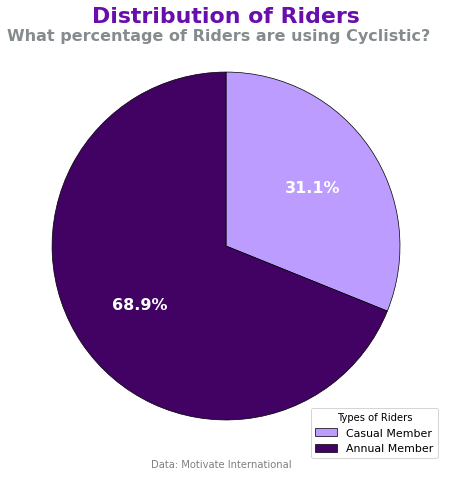

In [24]:
# Set plot size
plt.figure(figsize=(8, 8))

# defining colors
colors = ['#bc9cff', "#420264"]

# creating plot
plt.pie(usercount['percent_total'], 
        # labels=usercount['user_type'],
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        counterclock=False,
        wedgeprops={'linewidth': 0.7, 'edgecolor': 'black'},
        textprops={'color':"w", 'fontsize': 16, 'fontweight': 'bold'}
        )

plt.legend(title="Types of Riders",
           labels=["Casual Member", "Annual Member"],
           loc="lower right",
           fontsize=11,
           )

plt.title("Distribution of Riders", 
          fontsize=22,
          fontweight='bold',
          color='#6a0dad')

plt.suptitle('What percentage of Riders are using Cyclistic?', 
             fontsize=16,  
             fontweight='bold',
             color="#868B8E",
             y=0.88)

plt.annotate("Data: Motivate International", 
             xy=(0.65, -0.01), 
             fontsize=10,
             color='grey',
             xycoords='axes fraction',
             ha='right')

# Show plot
plt.show()

**Insight:**

So, for the last four months, percentage of annual members are larger compared to the Casual ones.

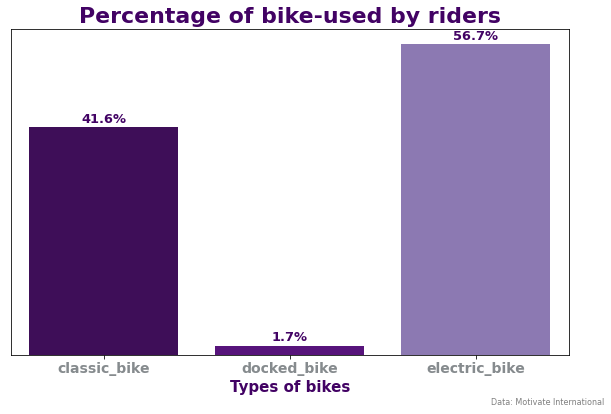

In [25]:
# Set the figure size
plt.figure(figsize=(10,6))

# Create the bar plot
sns.barplot(x="bike_type", y="percent_total", data=bike_usage, palette=["#420264", "#5C038C", "#896FBC"])

# Add the percentage labels to the bars
for index, row in bike_usage.iterrows():
    plt.text(row.name,
             row.percent_total + 0.9,
             str(round(row.percent_total,1))+'%', 
             horizontalalignment='center',
             fontsize=13,
             fontweight='bold',
             color="#420264")
    
# Add title, subtitle, and caption
plt.title("Percentage of bike-used by riders", fontsize=22, fontweight='bold', color='#420264')

plt.figtext(0.95, 0.01, "Data: Motivate International", horizontalalignment='right', fontsize=8, color='grey')

# Set the x and y axis labels and ticks
plt.xlabel("Types of bikes", fontsize=15, fontweight='bold', color='#420264')
plt.xticks(fontsize=14, fontweight='bold', color='#868B8E')
plt.yticks([])

# Remove the y-axis label and legend
plt.ylabel("")
# plt.legend().remove()

# Show the plot
plt.show()

**Insight:**

Electric bikes are more popular than the rest of the two, which shows that users prefer modernization and also wants to take good care of the environment.

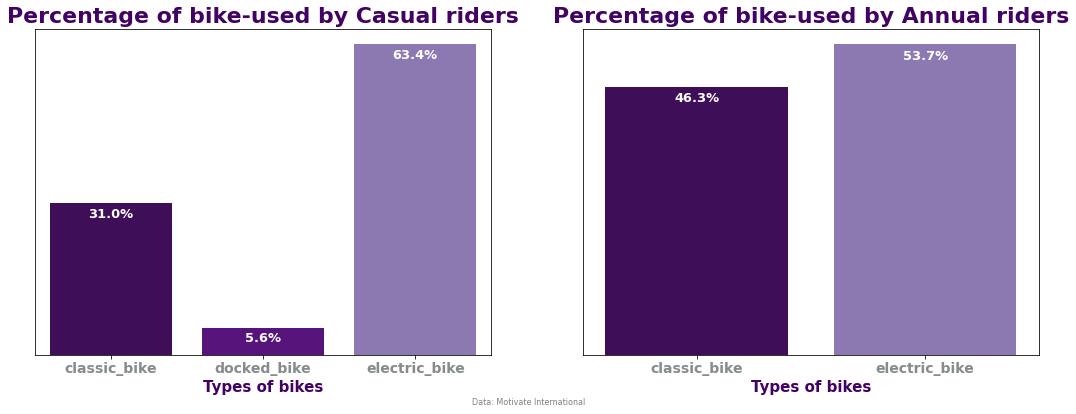

In [26]:
# Set the figure size
plt.figure(figsize=(18,6))

# Create the first bar plot
plt.subplot(1, 2, 1)
sns.barplot(x="bike_type", y="percent_casual", data=casual_member_biketype, palette=["#420264", "#5C038C", "#896FBC"])

# Add the percentage labels to the bars
for index, row in casual_member_biketype.iterrows():
    plt.text(row.name,
             row.percent_casual + -0.9,
             str(round(row.percent_casual,1))+'%', 
             horizontalalignment='center',
             verticalalignment='top',
             fontsize=13,
             fontweight='bold',
             color='w')
    
# Add title, subtitle, and caption
plt.title("Percentage of bike-used by Casual riders", fontsize=22, fontweight='bold', color='#420264')

# Set the x and y axis labels and ticks
plt.xlabel("Types of bikes", fontsize=15, fontweight='bold', color='#420264')
plt.xticks(fontsize=14, fontweight='bold', color='#868B8E')
plt.yticks([])

# Remove the y-axis label and legend
plt.ylabel("")
# plt.legend().remove()


# Create the second bar plot
plt.subplot(1, 2, 2)
sns.barplot(x="bike_type", y="percent_member", data=member_biketype, palette=["#420264", "#896FBC"])

# Add the percentage labels to the bars
for index, row in member_biketype.iterrows():
    plt.text(row.name,
             row.percent_member + -0.9,
             str(round(row.percent_member,1))+'%', 
             horizontalalignment='center',
             verticalalignment='top',
             fontsize=13,
             fontweight='bold',
             color='w',
             )
    
# Add title, subtitle, and caption
plt.title("Percentage of bike-used by Annual riders", fontsize=22, fontweight='bold', color='#420264')

plt.figtext(0.55, 0.01, "Data: Motivate International", horizontalalignment='right', fontsize=8, color='grey')

# Set the x and y axis labels and ticks
plt.xlabel("Types of bikes", fontsize=15, fontweight='bold', color='#420264')
plt.xticks(fontsize=14, fontweight='bold', color='#868B8E')
plt.yticks([])

# Remove the y-axis label and legend
plt.ylabel("")
# plt.legend().remove()

# Show the plots
plt.show()

**Insight:**

It's fascinating to observe the biking habits of our riders! Our data reveals that annual members are versatile in their bike choices, while casual users tend to gravitate towards electric bikes. This finding aligns with the fact that casual riders typically embark on longer journeys, and electric bikes can provide a comfortable and effortless ride. So, it seems like our riders' bike preferences are linked to their riding goals - whether it's a quick and efficient commute or a leisurely and enjoyable ride.

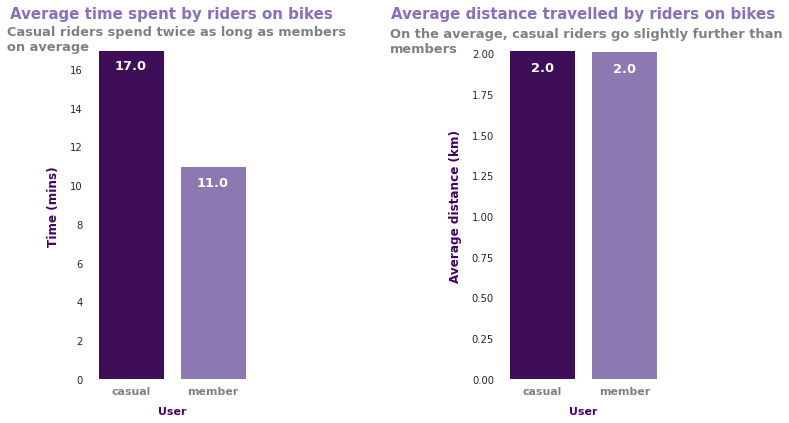

In [27]:
# Set plot size
plt.rcParams['figure.figsize'] = [10, 6]

# Create first plot
sns.set_style('white')

fig, ax = plt.subplots(1, 2)

sns.barplot(data=rides_time_per_user, x='user_type', y='avg_time', ax=ax[0], palette=["#420264", "#896FBC"])
sns.despine(left=True, bottom=True)
sns.set_context('notebook', font_scale=1.1)

# Add the percentage labels to the bars
for index, row in rides_time_per_user.iterrows():
    ax[0].text(row.name,
             row.avg_time + -0.5,
             str(row.avg_time), 
             horizontalalignment='center',
             verticalalignment='top',
             fontsize=13,
             fontweight='bold',
             color='w',
             )

ax[0].set_title('Average time spent by riders on bikes', color="#896FBC", fontweight='bold', size=15, pad=15)
ax[0].set_xlabel('User', color="#420264", fontweight='bold', size=11, labelpad=10)
ax[0].set_ylabel('Time (mins)', color="#420264", fontweight='bold', size=12, labelpad=10)
ax[0].text(-1.5, 17, 'Casual riders spend twice as long as members\non average', color='grey', fontweight='bold', size=13)
ax[0].set_xticklabels(rides_time_per_user['user_type'], rotation=0, color='grey', fontweight='bold', size=11)

# Create second plot
sns.barplot(data=dist_user_type, x='user_type', y='avg_dist', ax=ax[1], palette=["#420264", "#896FBC"])
sns.despine(left=True, bottom=True)
sns.set_context('notebook', font_scale=1.1)

# Add the percentage labels to the bars
for index, row in dist_user_type.iterrows():
    ax[1].text(row.name,
             row.avg_dist + -0.07,
             str(round(row.avg_dist, 1)), 
             horizontalalignment='center',
             verticalalignment='top',
             fontsize=13,
             fontweight='bold',
             color='w',
             )

ax[1].set_title('Average distance travelled by riders on bikes', color="#896FBC", fontweight='bold', size=15, pad=15)
ax[1].set_xlabel('User', color="#420264", fontweight='bold', size=11, labelpad=10)
ax[1].set_ylabel('Average distance (km)', color="#420264", fontweight='bold', size=12, labelpad=10)
ax[1].text(-1.85, 2.005, 'On the average, casual riders go slightly further than\nmembers', color='grey', fontweight='bold', size=13)
ax[1].set_xticklabels(dist_user_type['user_type'], rotation=0, color='grey', fontweight='bold', size=11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.5,
                    hspace=0.4)
plt.show()

**Insight:**

*   Based on the results, it appears that while both casual and member users travel an average distance, their riding habits differ. Casual users tend to have longer rides, suggesting a more leisurely approach to bike usage, while member users seem to use the bikes more as a pragmatic mode of public transportation.



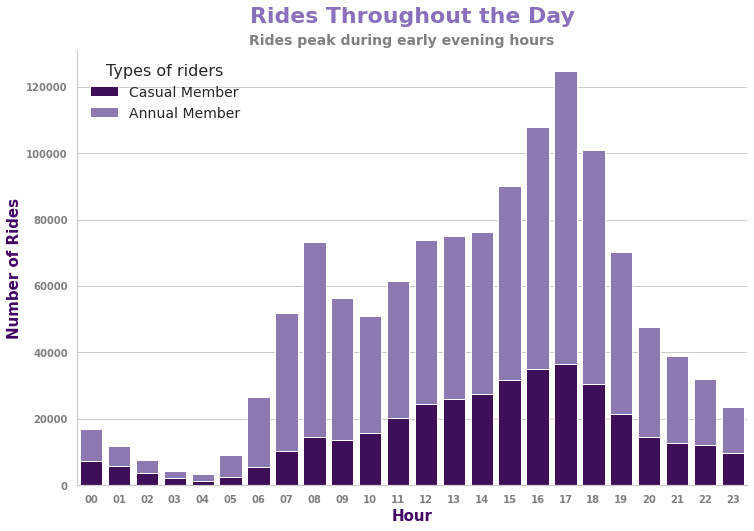

In [28]:
# creating a pivot table to generate a stacked bar chart
hour_table = pd.pivot_table(hour, index="hour", values='numberofrides', columns='user_type', aggfunc="sum")
hour_table = hour_table.reset_index()

# set the figure size
plt.figure(figsize=(12,8))

# set the plotting style
sns.set_style("whitegrid")

# Create a stacked bar chart
sns.barplot(x='hour', y='casual', data=hour_table, color="#420264", label='Casual Member')
sns.barplot(x='hour', y='member', data=hour_table, color="#896FBC", bottom=hour_table['casual'], label='Annual Member')

# set the axis labels and title
plt.xlabel("Hour", fontsize=15, fontweight="bold", color="#420264")
plt.ylabel("Number of Rides", fontsize=15, fontweight="bold", color="#420264")
plt.title("Rides Throughout the Day", fontsize=22, fontweight="bold", color="#896FBC", y=1.05)
plt.suptitle("Rides peak during early evening hours", fontsize=14, fontweight="bold", color="grey", y=0.91)

# set the legend
plt.legend(title="Types of riders", title_fontsize=16, fontsize=14, frameon=False,
          loc="upper left")

# remove the top and right spines
sns.despine(top=True, right=True)

# adjust the tick label size
plt.xticks(fontsize=10, color="grey", fontweight="bold")
plt.yticks(fontsize=10, color="grey", fontweight="bold")

# show the plot
plt.show()

**Insight:**

When it comes to bike share usage, the afternoon and evening are the hotspots for ridership! Interestingly, both casual riders and members prefer to hop on a bike during these hours. However, the morning paints a different picture. The data shows that members are the early birds of bike share, while casual riders tend to hit the snooze button. So, if you're a morning person looking for a peaceful ride, this might just be the perfect time to take advantage of the empty bike lanes!

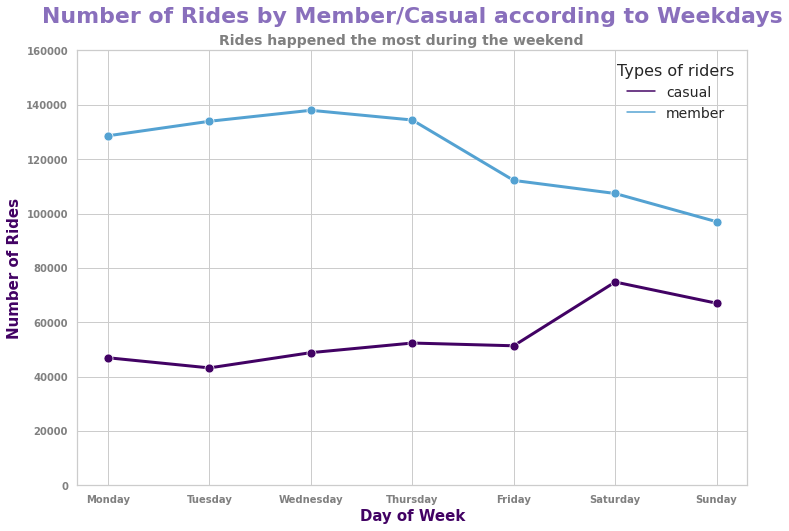

In [29]:
# Average number of rides in each weekday

# set the figure size
plt.figure(figsize=(12,8))

sns.lineplot(data=dayofweek,
             x='day_of_week',
             y="numberofrides",
             hue="user_type",
             palette={'casual': "#420264", 'member': "#54A2D2"},
             ci=None,
             estimator=None, 
             err_style=None,
             marker='o', 
             markersize=9, 
             dashes=False,
             linewidth=3, 
             style='user_type',
             hue_order=['casual', 'member'])

sns.set_style('whitegrid')
# sns.despine(left=True)
sns.set_context('notebook')
sns.set_palette('husl')

# set the axis labels and title
plt.xlabel("Day of Week", fontsize=15, fontweight="bold", color="#420264")
plt.ylabel("Number of Rides", fontsize=15, fontweight="bold", color="#420264")
plt.title("Number of Rides by Member/Casual according to Weekdays", fontsize=22, fontweight="bold", color="#896FBC", y=1.05)
plt.suptitle("Rides happened the most during the weekend", fontsize=14, fontweight="bold", color="grey", y=0.91)

# set the legend
plt.legend(title="Types of riders", title_fontsize=16, fontsize=14, frameon=False,
          loc="upper right")

# adjust the tick label size
plt.xticks(fontsize=10, color="grey", fontweight="bold")
plt.yticks(fontsize=10, color="grey", fontweight="bold")

plt.ylim([0,160000])

# show the plot
plt.show()

**Insight:**

Let's take a weekly snapshot of our riders' bike preferences! Our data reveals that annual members show a slight shift in their bike choice from the beginning to the end of the week. Classic bikes are the go-to option at the start, while electric bikes take the lead towards the end. It seems like our members are gearing up for the weekend with the help of our speedy and effortless e-bikes! So, whether it's a leisurely Sunday ride or a Monday morning commute, our bike share has got you covered.

###**Act:**

Based on the analysis of the available data, we can draw insights on the behavior of both casual and annual users. Casual users tend to use electric bikes mostly on weekends for leisure and tourism purposes, while annual users use both classic and electric bikes for pragmatic rides such as commuting during weekdays.

To motivate casual users to convert to an annual subscription, we recommend focusing on the leisure aspect of the service and offering promotions related to weekends and electric bikes. For instance, a targeted advertising campaign leading into the summer months could highlight the benefits of an annual subscription, including potential savings compared to casual usage. Additionally, a reward program for annual users could help incentivize casual users to make the switch.

Moreover, providing docked bikes in the annual membership could be an additional incentive for casual riders who might find it more convenient to use docked bikes. Overall, we believe that implementing these recommendations could help increase the number of annual subscribers and grow the business. We will share these insights and recommendations with the marketing team for further discussion and implementation.